In [14]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

In [ ]:
plotPerColumnDistribution(df1, 10, 5)

In [32]:
df=pd.read_csv('data/dataset_5secondWindow.csv')
df.head()

,Unnamed: 0,id,time,activityrecognition#0,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,...,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target,user
0,0,16170,78.0,NaN,100.0,9.811476,9.758895,9.849411,0.014626,0.029340,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,Still,U12
1,1,15871,145.0,NaN,100.0,9.939207,7.707437,17.146631,1.775944,0.999925,...,89.200210,89.065143,89.335277,0.191013,16.539349,16.539349,16.539349,0.628595,Car,U12
2,2,16811,150.0,NaN,100.0,9.827178,9.804817,9.849262,0.011199,0.665215,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,Still,U12
3,3,15831,105.0,NaN,77.0,9.673039,7.659674,12.304298,0.862553,0.996221,...,87.470377,87.470377,87.470377,2.284186,17.739895,17.739895,17.739895,0.628595,Car,U12
4,4,876,77.0,NaN,100.0,9.993466,8.965621,10.891645,0.504117,0.563792,...,89.770732,89.770732,89.770732,0.006389,9.000000,9.000000,9.000000,NaN,Car,U1


C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

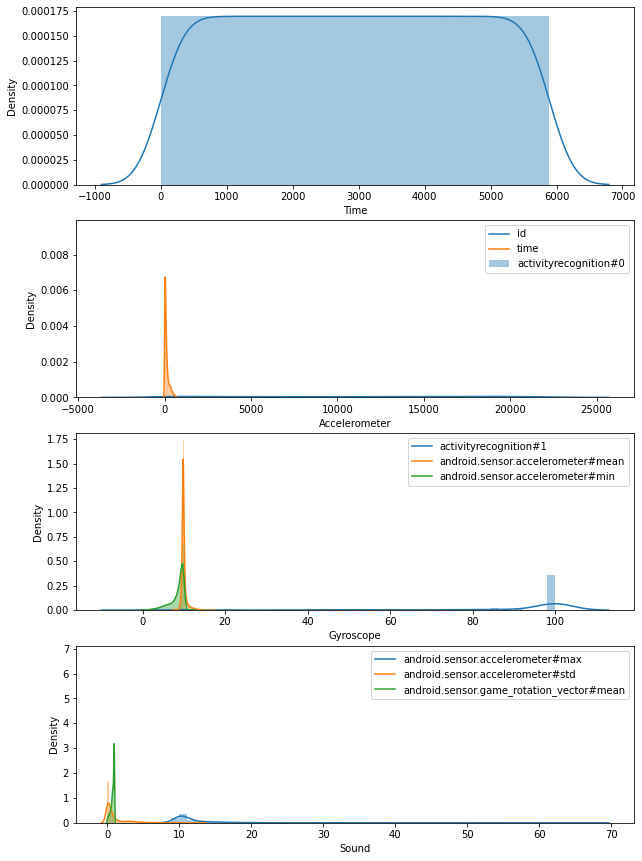

In [8]:
# Verificação da distribuição das variáveis restantes por sensor:

plt.figure(figsize=(10,15))

plt.subplot(4,1,1)
sns.distplot(df1.iloc[:,0])
plt.xlabel('Time')

plt.subplot(4,1,2)
for i in range(1,4):
    sns.distplot(df1.iloc[:,i])
plt.legend(df1.iloc[:,1:4].columns)
plt.xlabel('Accelerometer')

plt.subplot(4,1,3)
for i in range(4,7):
    sns.distplot(df1.iloc[:,i])
plt.legend(df1.iloc[:,4:7].columns)
plt.xlabel('Gyroscope')

plt.subplot(4,1,4)
for i in range(7,10):
    sns.distplot(df1.iloc[:,i])
plt.legend(df1.iloc[:,7:10].columns)
plt.xlabel('Sound')

plt.show()

In [9]:
from random import sample
data = df1.sample(n = 10000, random_state = np.random.RandomState(42))


ValueError: Cannot take a larger sample than population when 'replace=False'

In [20]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [26]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [27]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

<ipython-input-20-c4d51ae7f98d>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-20-c4d51ae7f98d>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


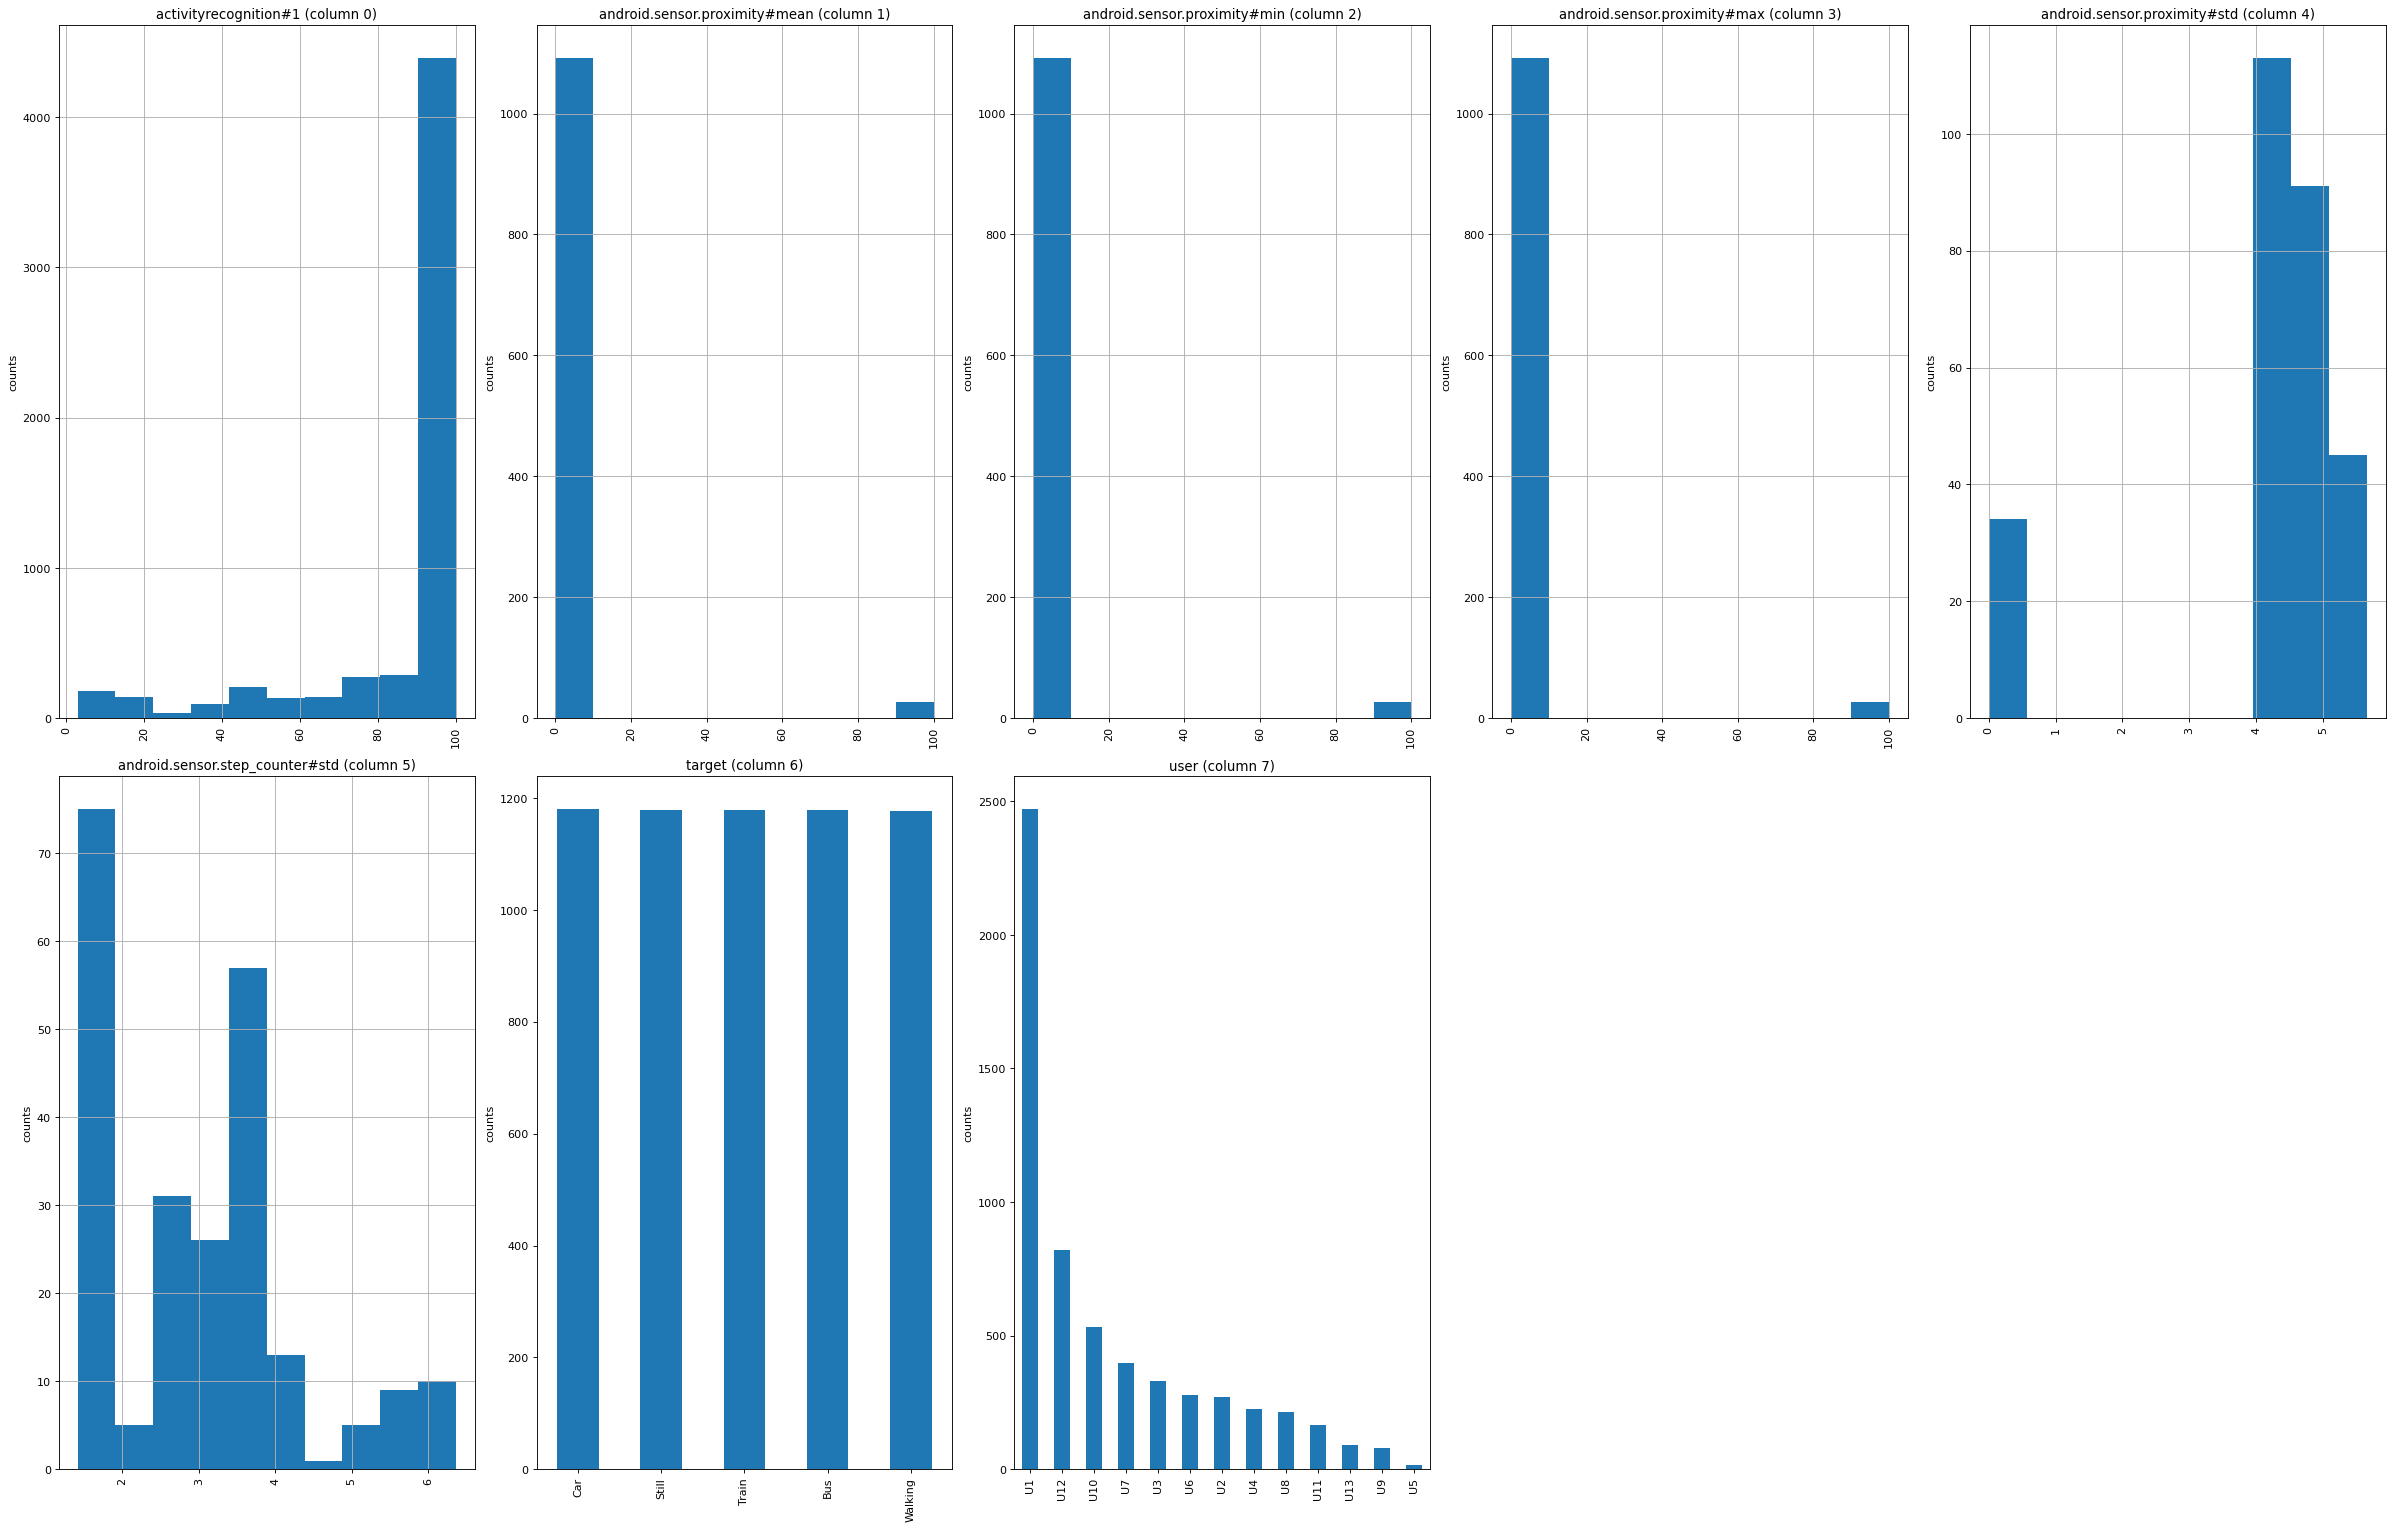

In [28]:
plotPerColumnDistribution(df, 10, 5)


In [29]:
plotCorrelationMatrix(df, 8)


AttributeError: 'DataFrame' object has no attribute 'dataframeName'

KeyError: 'target'

In [41]:
df['target_list']=pd.factorize(df['target'].tolist())[0]


0       0
1       1
2       0
3       1
4       1
       ..
5888    4
5889    2
5890    0
5891    0
5892    4
Name: target_list, Length: 5893, dtype: int64

In [37]:
df_5
df['target']
data_corr=df.corr()['target']

KeyError: 'target'

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


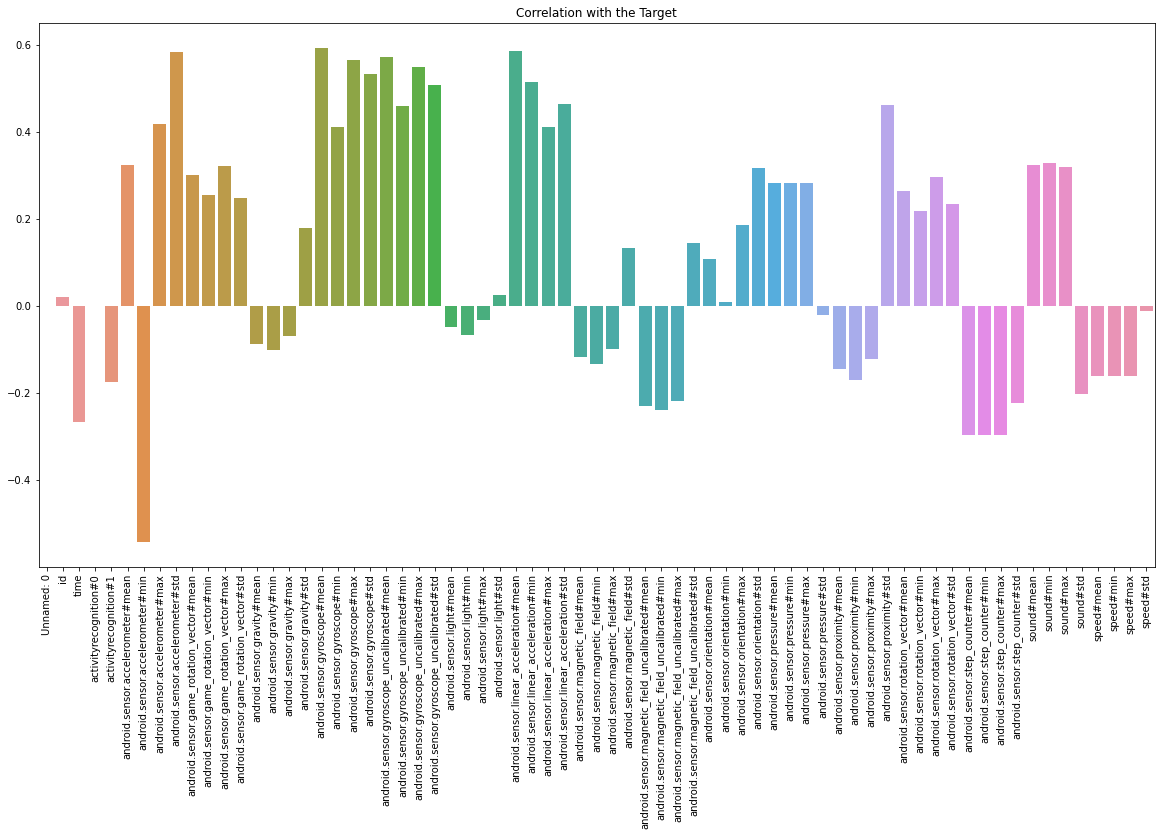

In [46]:


data_corr = df.corr()['target_list'] 
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
#sns.barplot(x = "names", y = "values", ax=ax, data=df)


sns.barplot(data_corr[0:-1].index,data_corr[0:-1].values,ax=ax).set_title('Correlation with the Target')
plt.xticks(rotation = 90)

plt.show()

In [47]:
df2=df


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


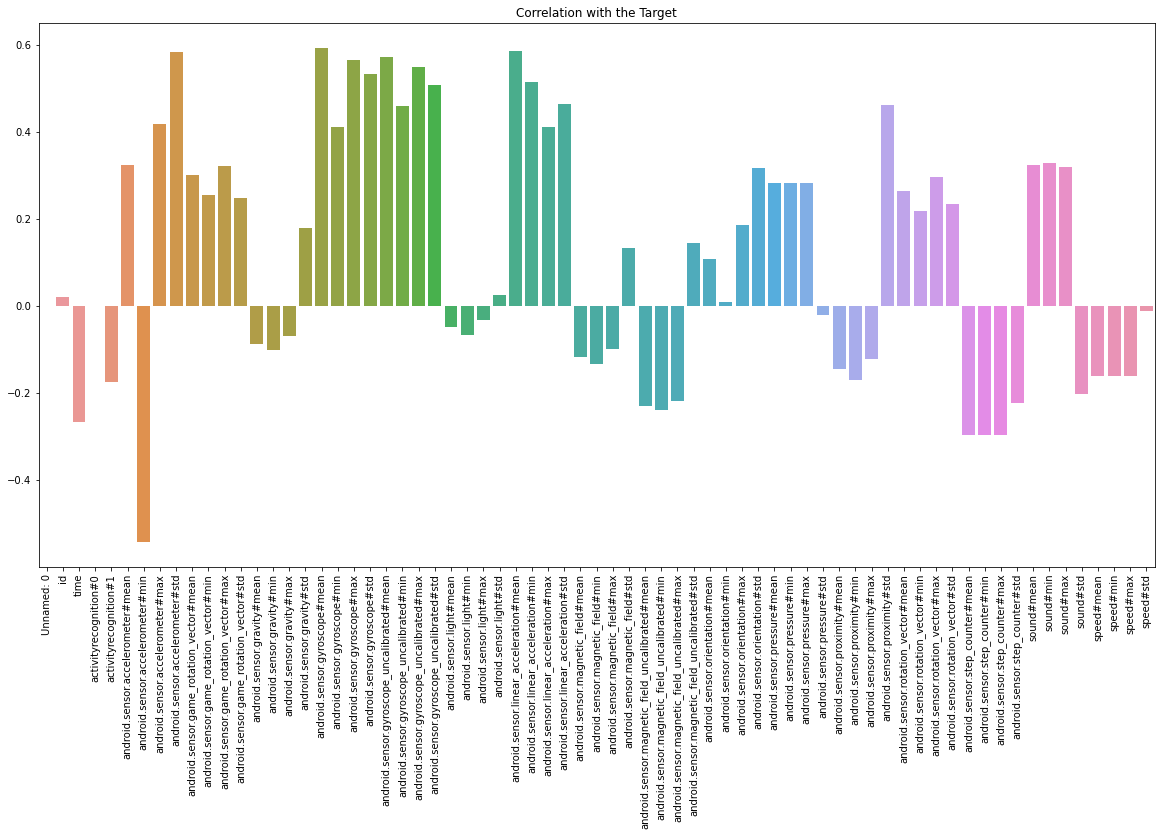

In [48]:


df2['target_list']=pd.factorize(df['target'].tolist())[0]
data_corr = df2.corr()['target_list'] 
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)


sns.barplot(data_corr[0:-1].index,data_corr[0:-1].values,ax=ax).set_title('Correlation with the Target')
plt.xticks(rotation = 90)

plt.show()

In [ ]:
import pandas_profiling as pp
pp.ProfileReport(df)

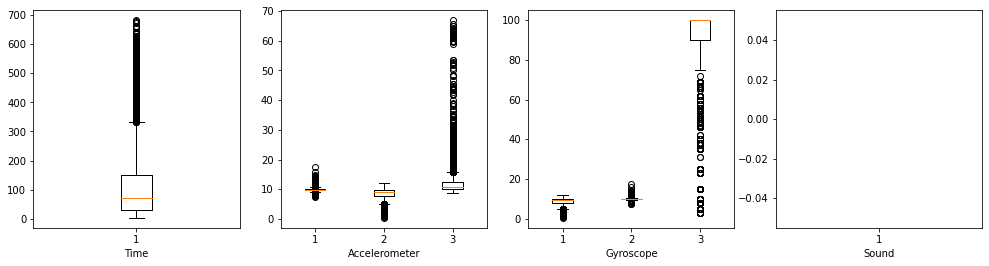

In [55]:
plt.figure(figsize=(17,4))

plt.subplot(141)
plt.boxplot(dataset.iloc[:,2])
plt.xlabel('Time')

plt.subplot(142)
plt.boxplot([dataset.iloc[:,5],dataset.iloc[:,6],dataset.iloc[:,7]])
plt.xlabel('Accelerometer')

plt.subplot(143)
plt.boxplot([dataset.iloc[:,6],dataset.iloc[:,5],dataset.iloc[:,4]])
plt.xlabel('Gyroscope')

plt.subplot(144)
plt.boxplot(dataset.iloc[:,-6]);
plt.xlabel('Sound')

plt.show()

In [50]:
dataset=df

In [52]:
df

,Unnamed: 0,id,time,activityrecognition#0,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,...,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target,user,target_list
0,0,16170,78.0,NaN,100.0,9.811476,9.758895,9.849411,0.014626,0.029340,...,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,Still,U12,0
1,1,15871,145.0,NaN,100.0,9.939207,7.707437,17.146631,1.775944,0.999925,...,89.065143,89.335277,0.191013,16.539349,16.539349,16.539349,0.628595,Car,U12,1
2,2,16811,150.0,NaN,100.0,9.827178,9.804817,9.849262,0.011199,0.665215,...,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,Still,U12,0
3,3,15831,105.0,NaN,77.0,9.673039,7.659674,12.304298,0.862553,0.996221,...,87.470377,87.470377,2.284186,17.739895,17.739895,17.739895,0.628595,Car,U12,1
4,4,876,77.0,NaN,100.0,9.993466,8.965621,10.891645,0.504117,0.563792,...,89.770732,89.770732,0.006389,9.000000,9.000000,9.000000,NaN,Car,U1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5888,5888,14125,4.0,NaN,100.0,10.066610,4.564648,13.414389,3.373972,0.986319,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walking,U2,4
5889,5889,19582,32.0,NaN,10.0,9.964271,8.768007,11.454213,0.665529,0.648602,...,NaN,NaN,NaN,31.960054,31.960054,31.960054,NaN,Train,U3,2
5890,5890,16178,86.0,NaN,100.0,9.812893,9.772881,9.862587,0.017633,0.024392,...,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,Still,U12,0
5891,5891,10973,199.0,NaN,100.0,9.831144,9.807347,9.874450,0.013485,0.481212,...,NaN,NaN,NaN,1.090415,1.090415,1.090415,NaN,Still,U10,0


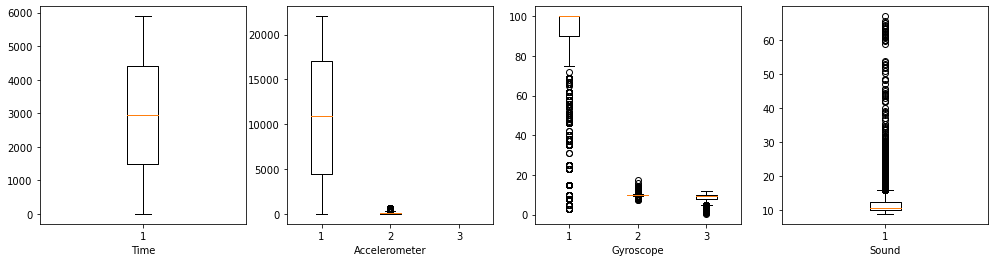

In [16]:
# Verificação dos valores das variáveis restantes através de um boxplot:

plt.figure(figsize=(17,4))

plt.subplot(141)
plt.boxplot(df1.iloc[:,0])
plt.xlabel('Time')

plt.subplot(142)
plt.boxplot([df1.iloc[:,1],df1.iloc[:,2],df1.iloc[:,3]])
plt.xlabel('Accelerometer')

plt.subplot(143)
plt.boxplot([df1.iloc[:,4],df1.iloc[:,5],df1.iloc[:,6]])
plt.xlabel('Gyroscope')

plt.subplot(144)
plt.boxplot(df1.iloc[:,7]);
plt.xlabel('Sound')

plt.show()

<AxesSubplot:>

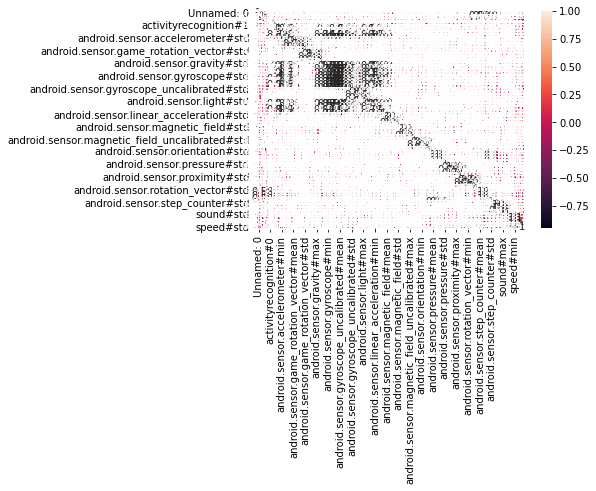

In [17]:
sns.heatmap(df1.corr(),annot=True)